# Ch3 - Linear Regression - Exercises - 3.15

## Imports

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np
from sklearn.linear_model import LinearRegression
from IPython.display import display


## Helper Functions

In [3]:
pd.options.display.float_format = '{:,.3f}'.format

## Loading data

In [41]:
boston = pd.read_csv('..''/Boston.csv', index_col=0)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,4.980,24.000
2,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,9.140,21.600
3,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,4.030,34.700
4,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,2.940,33.400
5,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,5.330,36.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.063,0.000,11.930,0,0.573,6.593,69.100,2.479,1,273,21.000,9.670,22.400
503,0.045,0.000,11.930,0,0.573,6.120,76.700,2.288,1,273,21.000,9.080,20.600
504,0.061,0.000,11.930,0,0.573,6.976,91.000,2.167,1,273,21.000,5.640,23.900
505,0.110,0.000,11.930,0,0.573,6.794,89.300,2.389,1,273,21.000,6.480,22.000


### a) For each predictor, fit a simple LR to predict the response. Describe the results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions

In [61]:
y = boston['crim']
results_models = {} 

predictors = [c for c in list(boston) if c not in ["crim"]]
for column in predictors:
    
    X = boston[column]
    X = sm.add_constant(X) # to have an intercept

    model = sm.OLS(y, X)
    results = model.fit()
    
    results_models[f'{(column)}'] = results.pvalues[column], results.tvalues[column], results.rsquared, results.params['const'], results.params[column]

In [62]:
values = ['p','t','r2','intercept', 'slope']
results_models = pd.DataFrame(results_models)
results_stat = results_models.iloc[0:5,0:12]
results_stat['values'] = values
results_stat = results_stat.set_index('values')
results_stat

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
values,,,,,,,,,,,,
p,0.000,0.000,0.209,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
t,-4.594,9.991,-1.257,10.419,-5.045,8.463,-9.213,17.998,16.099,6.801,11.491,-9.460
r2,0.040,0.165,0.003,0.177,0.048,0.124,0.144,0.391,0.340,0.084,0.208,0.151
intercept,4.454,-2.064,3.744,-13.720,20.482,-3.778,9.499,-2.287,-8.528,-17.647,-3.331,11.797
slope,-0.074,0.510,-1.893,31.249,-2.684,0.108,-1.551,0.618,0.030,1.152,0.549,-0.363


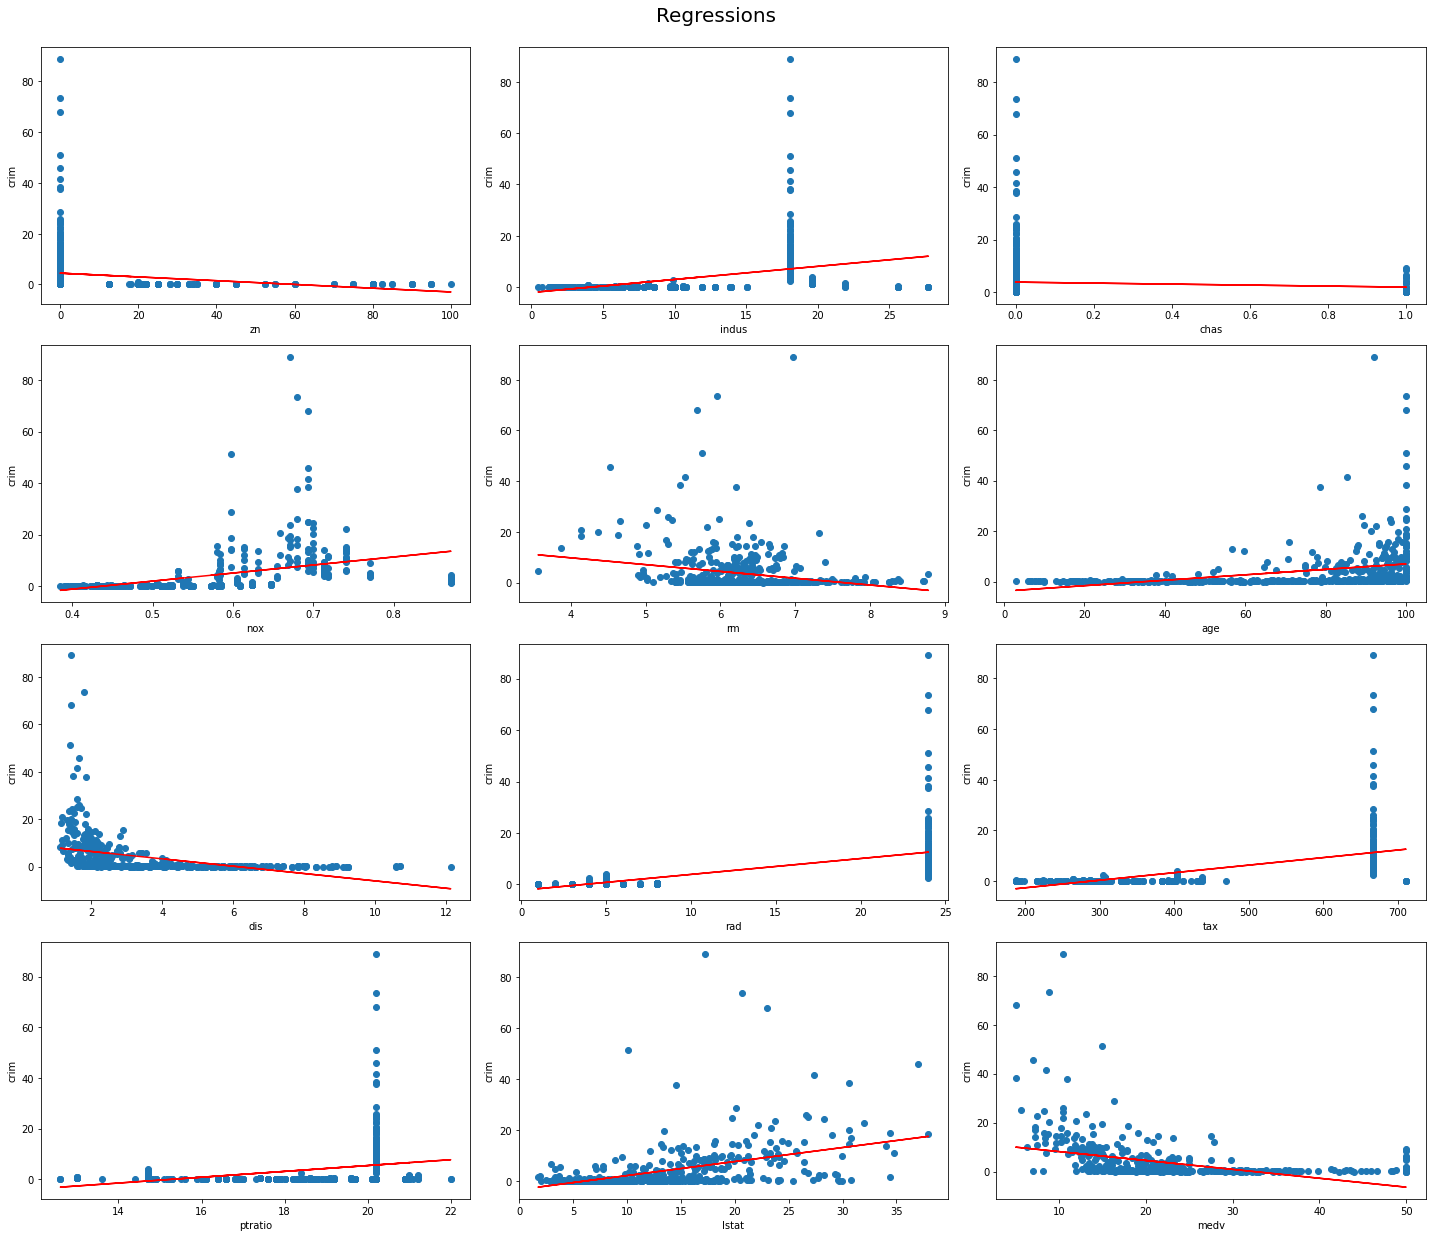

In [53]:
predictor = [c for c in list(boston) if c not in ["crim"]]
count=1
y = boston['crim']
plt.subplots(figsize=(20, 25))

for predictor in predictor:
    X = boston[predictor]
    X = sm.add_constant(X) # to have an intercept
    model = sm.OLS(y, X)
    results = model.fit()
    plt.subplot(6,3,count)
    plt.scatter(y=y, x=boston[predictor])
    plt.xlabel(predictor)
    plt.ylabel('crim')
    plt.plot(boston[predictor],results.fittedvalues, color='red')
    plt.suptitle('Regressions', y=1, fontsize = 20)
    plt.tight_layout()

    count+=1

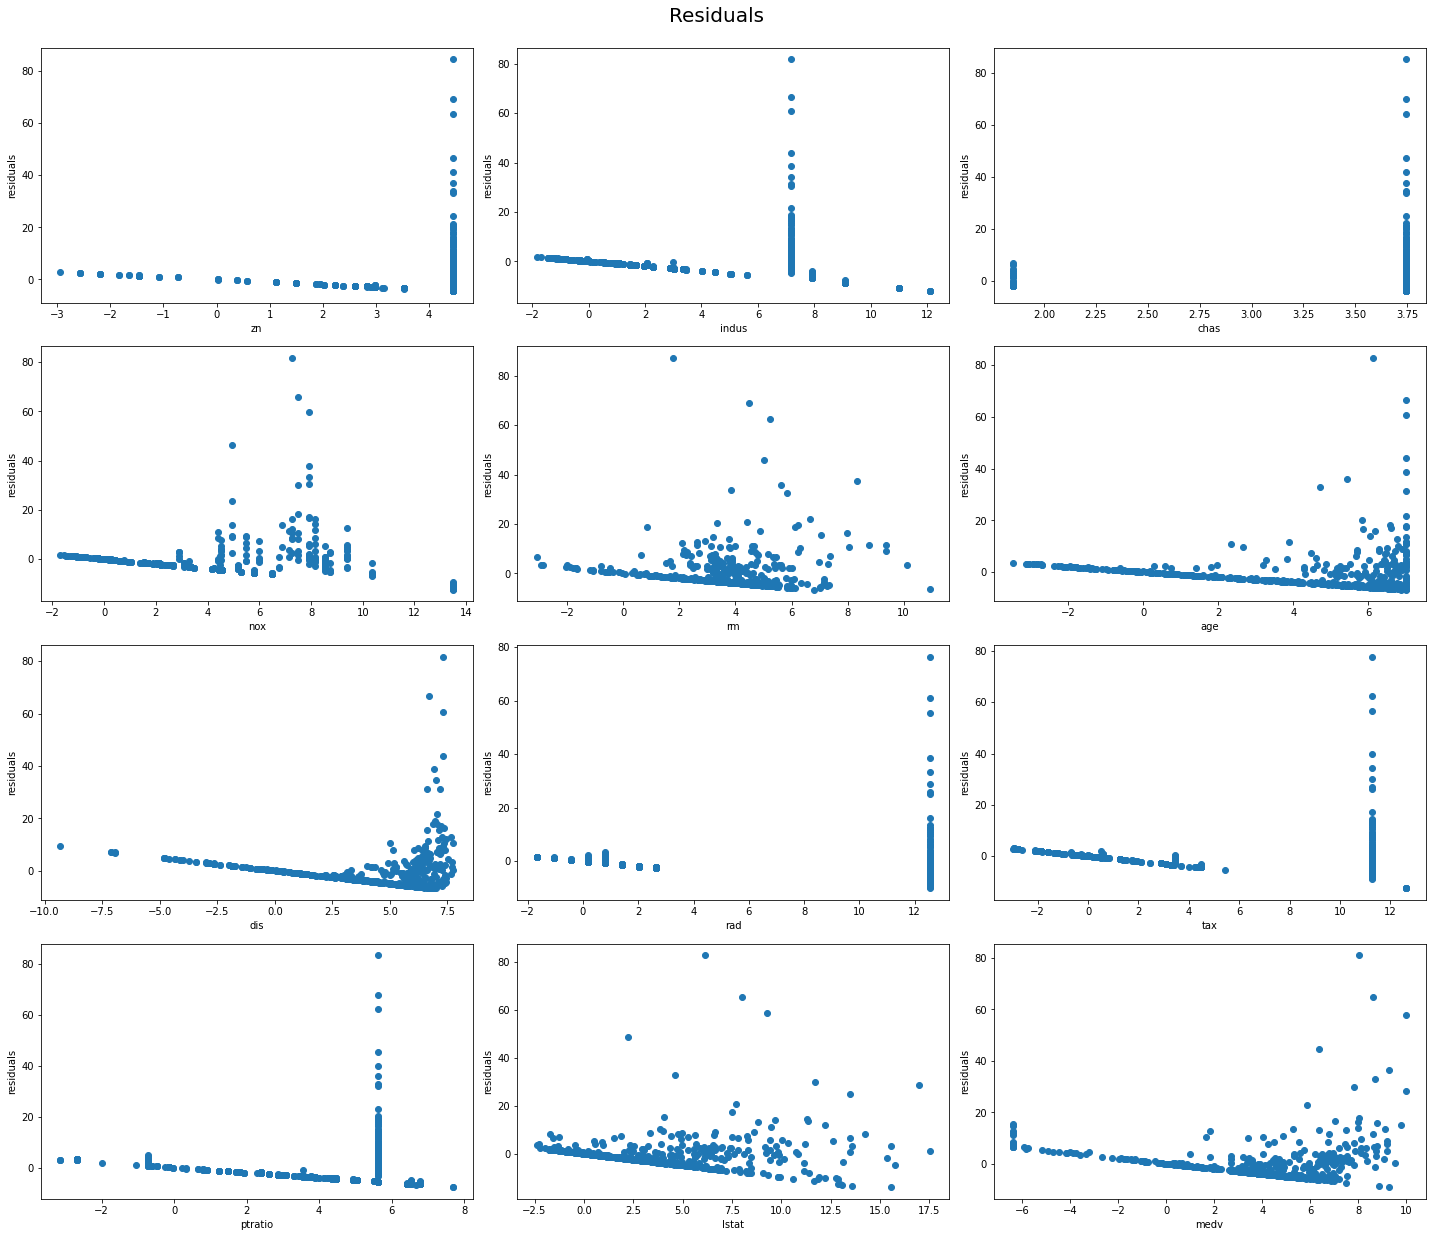

In [55]:
predictor = [c for c in list(boston) if c not in ["crim"]]
count=1
y = boston['crim']
plt.subplots(figsize=(20, 25))

for predictor in predictor:
    X = boston[predictor]
    X = sm.add_constant(X) # to have an intercept
    model = sm.OLS(y, X)
    results = model.fit()
    plt.subplot(6,3,count)
    plt.scatter(y=results.resid ,x=results.fittedvalues)
    plt.xlabel(predictor)
    plt.ylabel('residuals')
    plt.suptitle('Residuals', y=1, fontsize = 20)
    plt.tight_layout()
    count+=1

### b) Fit a multiple RM to predict the response using all the predictors. Describe your results. For which predictior can we reject the null? 

In [56]:
X_multi = boston.iloc[:,1:13]
X_multi = sm.add_constant(X_multi) # to have an intercept
y_multi = boston['crim']

In [57]:
model_multi = sm.OLS(y_multi, X_multi)
results_multi = model_multi.fit()
print(results_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           2.03e-56
Time:                        12:14:29   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

### c) How do your results from (a) compare from (b)? Create a plot displaying the univariate regression coeff. from (a) on the x-axis and the multiple regression coeff from (b) on the y axis. Each predictor is displayed as a single point in the plot. 

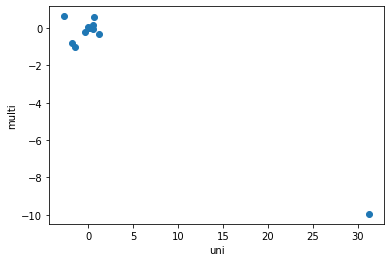

In [58]:
plt.scatter(x=list(results_stat.T['slope']), y=list(results_multi.params)[1:]);
plt.xlabel('uni')
plt.ylabel('multi');

### d) In there evidence of non linear association between any of the predictors and response? To answer this, for each predictor X, fit a model of the form Y=b0 + b1X + b2x2 + b3x3 + e 

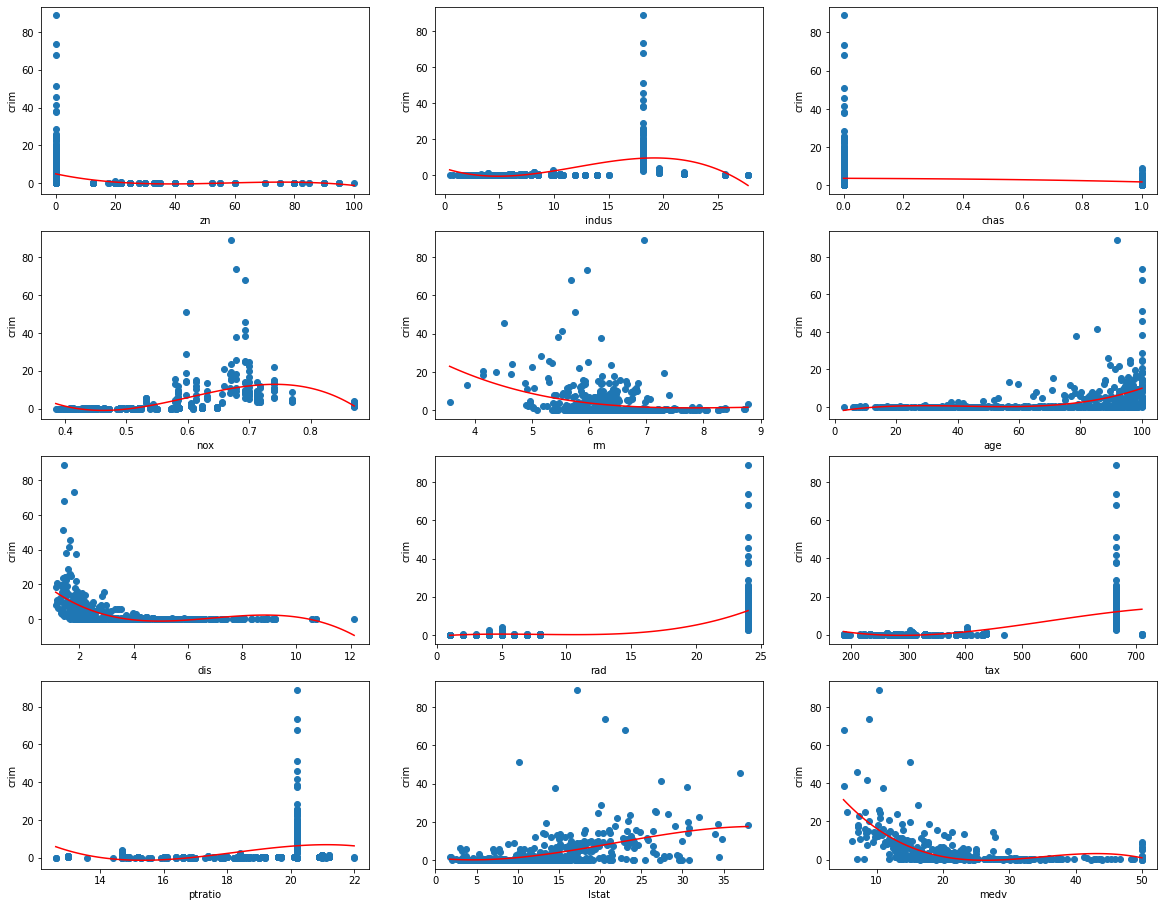

In [59]:
count = 1 
plt.figure(figsize=(20, 20))

predictors = [c for c in list(boston) if c not in ["crim"]]

for predictor in predictors:
    model_c = 'crim ~ ' + predictor + " + np.power(" + predictor + ", 2) + np.power(" + predictor + ", 3)"
    results_c = smf.ols(formula = model_c, data=boston).fit()
    plt.subplot(5,3,count)
    plt.xlabel(predictor)
    plt.ylabel("crim")
    plt.scatter(boston[predictor], boston['crim'])
    x = np.linspace(min(boston[predictor]),max(boston[predictor]), 100)
    y = results_c.params[0] + x*results_c.params[1]+ results_c.params[2]*(x**2)+ results_c.params[3]*(x**3)
    plt.plot(x, y, color='red') 
    count +=1 

In [77]:
predictors = [c for c in list(boston) if c not in ["crim"]]
results = {}
for predictor in predictors:
    model_c = 'crim ~ ' + predictor + " + np.power(" + predictor + ", 2) + np.power(" + predictor + ", 3)"
    results_c = smf.ols(formula = model_c, data=boston).fit()
    results[f'{(predictor)}'] = results_c.pvalues[1], results_c.tvalues[1], results_c.rsquared

In [83]:
non_linear_results = pd.DataFrame(results).T 
non_linear_results.columns = ['pvalues', 'tvalues', 'rsquared']
non_linear_results

,pvalues,tvalues,rsquared
zn,0.003,-3.025,0.058
indus,0.000,-4.077,0.260
chas,0.209,-1.257,0.003
nox,0.000,-7.508,0.297
rm,0.212,-1.250,0.068
age,0.143,1.468,0.174
dis,0.000,-8.960,0.278
rad,0.623,0.491,0.400
tax,0.110,-1.602,0.369
ptratio,0.003,-2.979,0.114
